## Método de Euler. Exemplo 2.

Nesta notebook vamos repetir o que fizemos no exemplo anterior, considerando agora o PVI: 

O PVI é $$y'=\frac{y+x^2-2}{x+1},\quad y(0)=2$$ e vamos estudar a aproximação de sua solução $$\varphi(x) = x^2+2x+2-2(x+1)\ln(x+1)$$ sobre o intervalo $[0,6]$.


In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
import pandas as pd
#Para mostrar tabelas mais bonitas
from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Erro de Truncamento Local

Precisaremos definir no Python a função no termo direito da equação e a solução exata do PVI.

In [2]:
def f_1(a, b):# função no membro direito da equação
    return (b+a**2-2)/(a+1)
def phi_1(a):# solução exata da equação
    return a**2+2*a+2-2*(a+1)*np.log(a+1)  

Vamos introduzir no Python algumas constantes necessárias.

In [3]:
# Condições iniciais
x0 = 0
y0 = 2
X = 6 #Extremo direito do intervalo

O erro de truncamento em cada ponto $x$ é definido por 

$\displaystyle \tau(x;h)=\frac{\varphi(x+h)-\varphi(x)}{h}-f(x,\varphi(x))$.

No Python, ele ficaria definido assim



In [4]:
def tau(a, h, f, sol_exata):# erro de truncamento no ponto x
    return (sol_exata(a+h) - sol_exata(a))/h - f(a, sol_exata(a))

Podemos visualizar no Python o comportamento do erro local de truncamento. Plotaremos o erro de truncamento como função de $x$ para vários valores diferentes de $h$.

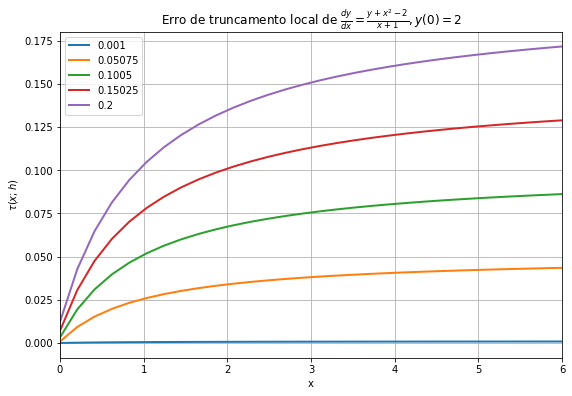

In [5]:
# Plotagem do erro de truncamento local.
plt.figure(figsize=(9.0, 6.0))  # Fixar o tamanho da figura
plt.title(r"Erro de truncamento local de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$")  # título
plt.xlabel('x')
plt.ylabel(r'$\tau(x;h)$')
plt.xlim(0, 6)  # especifica limites no eixo x
#plt.ylim(40.0, 160.0)  # especifica limites no eixo y
plt.grid()  # malha do fundo para melhorar a visibilidade
arranjo_h = np.linspace(0.001, 0.2, 5) # valores de h
arranjo_x = np.linspace(x0, X, 30) # malha em x para plotar
counter = -1
for h in arranjo_h:
    counter += 1
    #plotar a função tau para um h fixo
    plt.plot(arranjo_x, tau(arranjo_x, h, f_1, phi_1), label = str(h),  
             color = 'C'+str(counter), linestyle='-', linewidth=2)

plt.legend();

Podemos ver que o erro de truncamento diminui com a diminuição do valor de $h$. 

## 2. Implementação do método

A seguir, implementamos o método de Euler. No Python, vamos criar uma função que executa o passo do método através da função passo_Euler que recebe x, y, f, h como entradas e retorna o próximo valor aproximado da solução.

É interessante implementar apenas o passo porque se formos usar um outro método de passo único poderemos aproveitar o resto do código.

In [6]:
#Passo do Método de Euler
def passo_Euler(x, y, f, h):
    """
    Executa uma iteração do método de Euler.
    
    Parâmetros
    ----------
    u : float.
        Aproximação da solução no ponto anterior.
    f : function
        Função para avaliar o termo direito do sistema.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    y_novo = y + h * f(x,y)
    return y_novo    

A seguir, aplicaremos o método de Euler com 6 tamanhos de passo diferentes. Faremos isso para podermos analisar melhor a convergência do método.

In [7]:
# Consideramos 6 tamanhos de passo possíveis
lista_h = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
# Lista com as malhas
lista_x = []
# Lista com as soluções aproximadas para cada malha
lista_y = []
# Lista com os erros absolutos de cada malha
erros_abs = []
#Aplicamos o método de Euler
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha 
    y = np.empty_like(x) #inicializar z
    x[0] = x0 #x inicial
    y[0] = y0 #y inicial
    # N iterações do método de Euler.
    for n in range(N):
        y[n + 1] = passo_Euler(x[n],y[n],f_1,h) #iteração do método de Euler
    lista_x.append(x) #armazenar malha 
    lista_y.append(y)  # armazenar arranjo com as aproximações usando essa malha
    erros_abs. append(phi_1(x)-y) # armazenar erro global  

## 3. Erro Global

No código acima calculamos as aproximações $y_j$ em cada ponto $x_j$ da malha para diferentes valores de $h$ e também calculamos o **erro global** $e_j = \varphi(x_j) - y_j,\quad 1 \leq j \leq N$.

A seguir, vamos representar os resultados obtidos de várias maneiras. 

Primeiro, vamos usar uma tabela para comparar alguns valores.

In [8]:
#Mostrar apenas 4 dígitos depois da vírgula
pd.set_option('precision',4)
#Pontos da malha cujos erros serão mostrados
x = np.linspace(1, 6, 6)
#d: Dicionário com os dados que serão tabelados
d = {'x': x} # Valores de x cujos erros serão exibidos
for j in range(len(lista_h)):# em cada iteração do loop, calculamos 3 colunas
    d['h'+str(j+1)] = [lista_h[j],'','','','',''] # Coluna com o h usado
    err_abs = erros_abs[j][int(1/lista_h[j]):int((X-x0)/lista_h[j] + 1):int(1/lista_h[j])]
    d['Erro Abs. '+ str(j+1)] = err_abs # coluna do erro absoluto
    d['Erro Rel. '+ str(j+1)] = err_abs/phi_1(lista_x[j][int(1/lista_h[j]):int((X-x0)/lista_h[j] + 1)\
                                                         :int(1/lista_h[j])])# coluna do erro relativo
df = pd.DataFrame(data=d) # Formação da tabela
df.style.set_properties(**{'text-align': 'left'}) #Alinhamento à esquerda nas colunas
HTML(df.to_html(index=False)) # Tirar a coluna de índices

x,h1,Erro Abs. 1,Erro Rel. 1,h2,Erro Abs. 2,Erro Rel. 2,h3,Erro Abs. 3,Erro Rel. 3,h4,Erro Abs. 4,Erro Rel. 4,h5,Erro Abs. 5,Erro Rel. 5,h6,Erro Abs. 6,Erro Rel. 6
1.0,0.2,0.0682,0.0306,0.1,0.0363,0.0163,0.05,0.0187,0.0084,0.01,0.0038,0.0017,0.005,0.0019,0.0009,0.001,0.0004,0.0002
2.0,,0.2386,0.0700,,0.1242,0.0365,,0.0634,0.0186,,0.0129,0.0038,,0.0065,0.0019,,0.0013,0.0004
3.0,,0.4764,0.0806,,0.2461,0.0416,,0.1251,0.0212,,0.0254,0.0043,,0.0127,0.0021,,0.0025,0.0004
4.0,,0.7645,0.0772,,0.3931,0.0397,,0.1994,0.0201,,0.0404,0.0041,,0.0202,0.0020,,0.0040,0.0004
5.0,,1.0927,0.0705,,0.5603,0.0361,,0.2838,0.0183,,0.0574,0.0037,,0.0287,0.0019,,0.0057,0.0004
6.0,,1.4544,0.0639,,0.7441,0.0327,,0.3765,0.0165,,0.0760,0.0033,,0.0381,0.0017,,0.0076,0.0003


Na tabela observamos que, de fato, os erros diminuem com a diminuição do valor de $h$. Também podemos observar que os erros são maiores que os do exemplo 1.

Podemos representar os resultados também usando diferentes tipos de gráficos.

A seguir plotamos a solução exata junto com algumas soluções aproximadas que são interpoladas linearmente pelo Python.

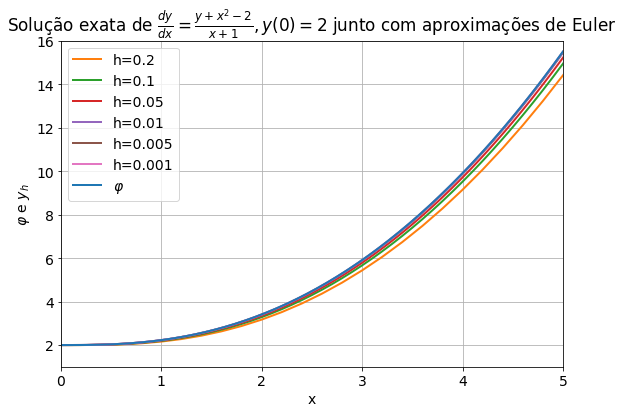

In [9]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as três aproximações obtidas.
plt.figure(figsize=(9.0, 6.0))  # Fixar o tamanho da figura
# título
plt.title(r"Solução exata de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$ junto com aproximações de Euler")  
plt.xlabel('x')
plt.ylabel(r'$\varphi$ e $y_h$')
plt.xlim(0, 5)  # especifica limites no eixo x
plt.ylim(1, 16)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readability
for j in range(len(lista_h)):
    plt.plot(lista_x[j], lista_y[j], label='h='+str(lista_h[j]), color = 'C'+str(j+1), linestyle='-', linewidth=2)
x1 = np.linspace(0, 5, 50)
plt.plot(x1, phi_1(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2)
plt.legend();
#plt.savefig(’tmp3.pdf’)
#plt.show()

O gráfico anterior não nos permitiu distinguir o comportamento das aproximações perto de $x=X$. 
Vamos então plotar apenas os erros.

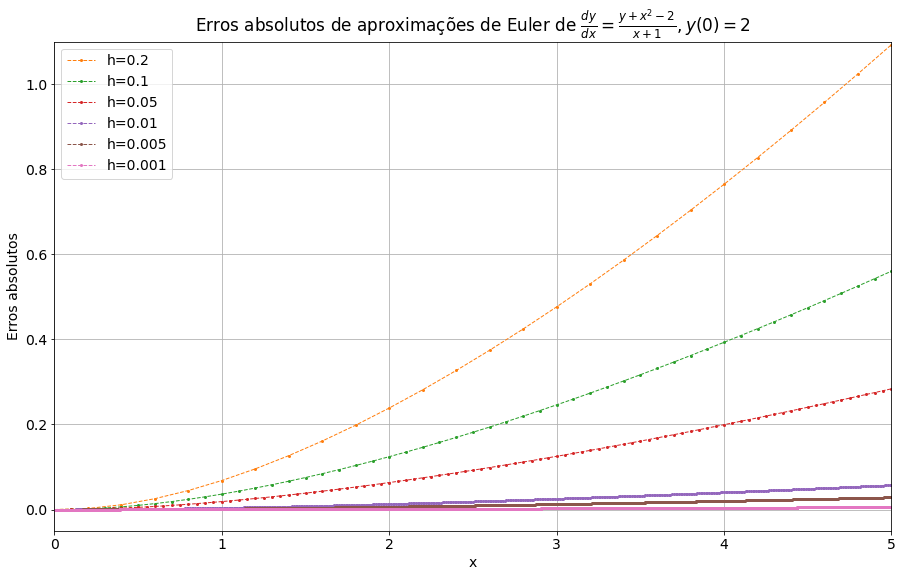

In [10]:
# Plotagem dos erros das aproximações obtidas.
plt.figure(figsize=(15.0, 9.0))  # Fixar o tamanho da figura
plt.title(r"Erros absolutos de aproximações de Euler de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$")  # título
plt.xlabel('x')
plt.ylabel('Erros absolutos')
plt.xlim(0, 5)  # especifica limites no eixo x
plt.ylim(-0.05, 1.1)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readability
for j in range(len(lista_h)):
    plt.plot(lista_x[j], erros_abs[j], label='h='+str(lista_h[j]),\
             color = 'C'+str(j+1), marker='o', linewidth=1, linestyle='--', markersize=2)
plt.legend();


Agora a visualização melhorou mas como há uma grande diferença entre o maior e o menor erro, não é possível ter uma boa visualização de todos eles. Podemos melhorar isso mudando a escala para a escala logarítmica.

No gráfico a seguir, usaremos a escala logarítmica no eixo y.

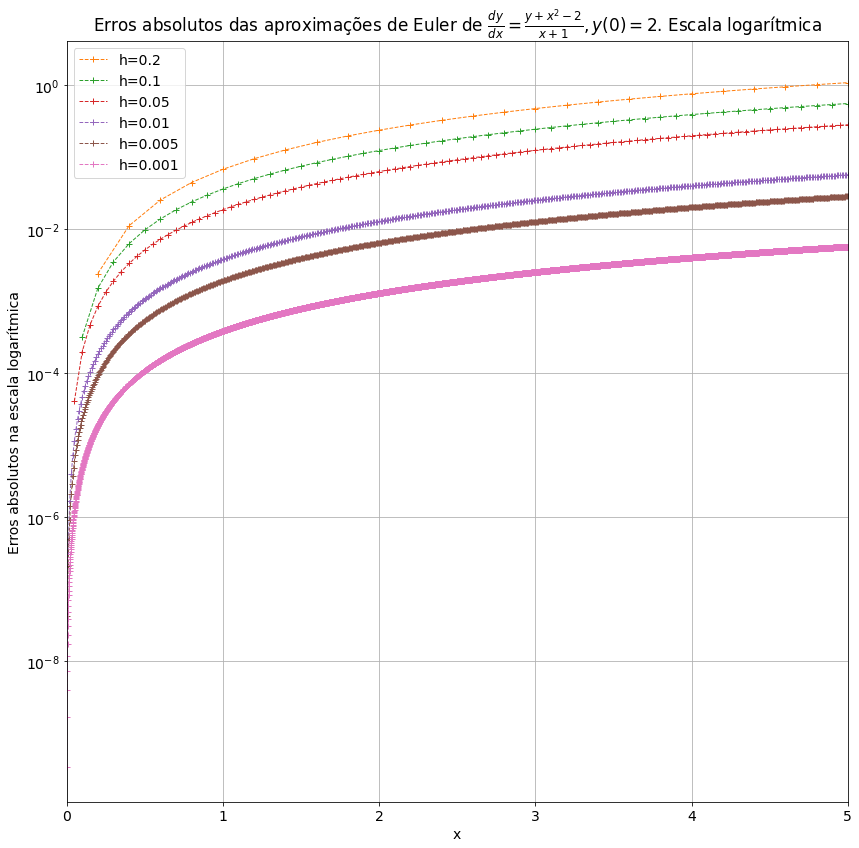

In [11]:
# Plotagem dos erros das aproximações obtidas na escala logarítmica.
plt.figure(figsize=(14.0, 14.0))  # Fixar o tamanho da figura
plt.title(r"Erros absolutos das aproximações de Euler de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$. Escala logarítmica")  # título
plt.xlabel('x')
plt.ylabel('Erros absolutos na escala logarítmica')
plt.xlim(0, 5)  # especifica limites no eixo x
#plt.ylim(40.0, 160.0)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readabilityfor j in range(len(lista_h)):
for j in range(len(lista_h)):
    plt.plot(lista_x[j][1:-1], abs(erros_abs[j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')    
plt.semilogy()
plt.legend();

Observe que algumas das curvas obtidas parecem ser uma translação da outra, da mesma constante. Por quê?

Pode ser provado que $$\varphi(x) - y_h(x) \approx c(x) h.$$

Portanto, para $x$ fixado, $\log |\varphi(x) - y_h(x)| \approx \log |c(x)| + \log h$ e se $h_1 = kh$, então 

$\log(|\varphi(x) - y_{h_1}(x)|) \approx \log|c(x)| + \log kh = \log k + (\log|c(x)| + \log h).$ 

Poderíamos usar a escala logarítmica no eixo $x$ também. No próximo gráfico representamos $E(h)$ como função de $h$ usando a escala logarítmica nos dois eixos.

0.9911840173584425


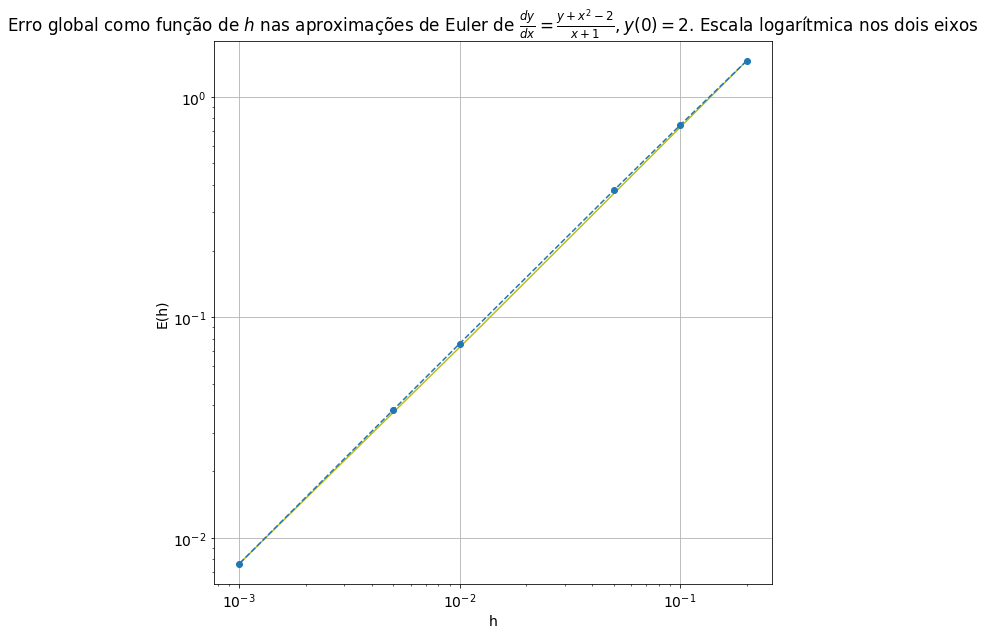

In [12]:
# Plotagem de E(h) como função de h na escala logarítmica nos dois eixos.
E = np.array([np.max(np.abs(erros_abs[j])) for j in range(len(lista_h))]) # Cálculo de E(h)
plt.figure(figsize=(10.0, 10.0))  # Fixar o tamanho da figura
plt.title(r"Erro global como função de $h$ nas aproximações de Euler de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$. Escala logarítmica nos dois eixos")  # título
plt.xlabel('h')
plt.ylabel(r'E(h)')
#plt.xlim(0, 0.2)  # especifica limites no eixo x
#plt.ylim(40.0, 160.0)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readabilityfor j in range(len(lista_h)):
plt.loglog(np.linspace(lista_h[0], lista_h[5], 20), np.linspace(E[0], E[5], 20), color='C8', linestyle='-')\
# plotar log-log 
plt.loglog(lista_h, E, color='C0', linestyle='--', marker='o')  # plotar log-log 
plt.axis('equal');  # make axes scale equally
#Coeficiente angular do segmento verde
print((np.log(E[0])- np.log(E[5]))/(np.log(lista_h[0]) - np.log(lista_h[5])))

A curva azul no gráfico acima mostra que de fato, $E(h)$ diminui com $h$. Como o segmento verde, que interpola linearmente os pontos nos extremos do gráfico e que tem coeficiente angular aproximadamente igual a 0.99,  fica bastante próximo do gráfico azul,concluimos também que o comportamente de $E$ como função de $h$, pelo menos neste exemplo, é bastante próximo de um comportamento linear.

## 4. Conclusões 

* Nesta notebook estudamos o comportamento do erro de truncamento local e do erro global do método de Euler para o caso particular do PVI. Os resultados confirmam o fato do método ser de primeira ordem 

* **A visualização dos resultados é uma questão superimportante!!** O método de representação escolhido depende das propriedades que querem ser evidenciadas.